# Classification with Neural Networks

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 5


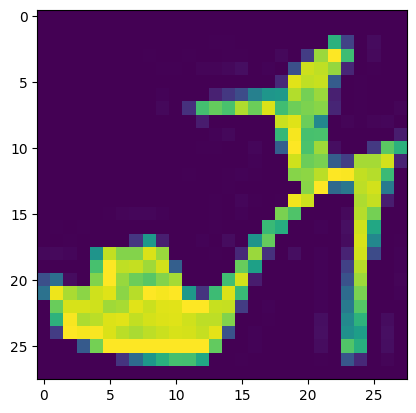

In [2]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


## Building a Neural Network Architecture

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7248 - accuracy: 0.7631 - val_loss: 0.5160 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4928 - accuracy: 0.8283 - val_loss: 0.4568 - val_accuracy: 0.8378
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4478 - accuracy: 0.8430 - val_loss: 0.4309 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4211 - accuracy: 0.8517 - val_loss: 0.4034 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4000 - accuracy: 0.8594 - val_loss: 0.3906 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8647 - val_loss: 0.3856 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3700 - accuracy: 0.8699 - val_loss: 0.3688 - val_accuracy

In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 78ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 0]
